# K-Nearest Neighbors Classifier

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import scipy
import sklearn
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_val_predict
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
X = np.genfromtxt("AggregatedData.csv", delimiter=",", usecols=(1, 3, 4, 5))
y = np.genfromtxt("AggregatedData.csv", delimiter=",", usecols=8)

m,n = X.shape
print('Number of features:', n)
print('Number of data points', m)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

Number of features: 4
Number of data points 1500


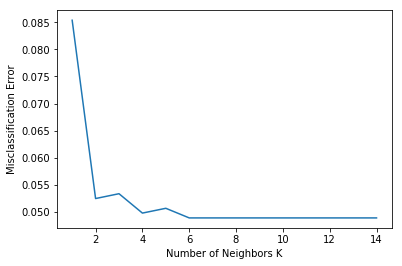

Reccomended K:  6


In [3]:
myList = list(range(1,15))

MSE = []

for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    MSE.append(1-scores.mean())

plt.plot(myList, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("Reccomended K: ", myList[np.argmin(MSE)])

Accuracy: 95.733%


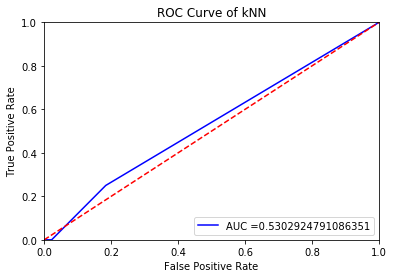

In [4]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
result = knn.score(X_test, y_test)
y_scores = knn.predict_proba(X_test)
predictions = knn.predict(X_test)
print("Accuracy: %.3f%%" % (result*100.0))
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = "AUC =" +str(roc_auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [5]:
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=["No Outbreak", "Outbreak"], yticklabels=["No Outbreak", "Outbreak"],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Confusion matrix, without normalization
[[359   0]
 [ 16   0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


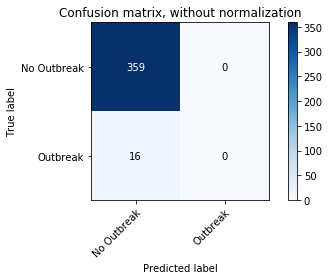

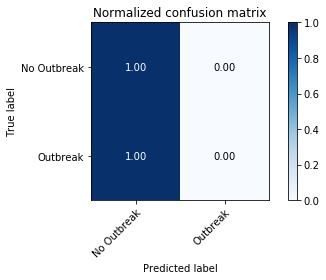

In [6]:
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred,title='Confusion matrix, without normalization')

plot_confusion_matrix(y_test, y_pred, normalize=True,title='Normalized confusion matrix')

plt.show()

#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Splitting into Train and Test Sets

In [7]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

test_size = 0.25
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

#https://scikit-learn.org/stable/modules/cross_validation.html

Accuracy: 95.733%


# Leave One Out CV

In [8]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.neighbors import NearestNeighbors

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0, stratify=y)

loo = LeaveOneOut()
loo.get_n_splits(X) 

loocv = model_selection.LeaveOneOut()
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=loocv)
print("Accuracy: %.3f%% Standard Deviation (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#https://scikit-learn.org/stable/modules/cross_validation.html

Accuracy: 95.267% Standard Deviation (21.235%)


# K-Fold Cross Validation

In [9]:
kfold = model_selection.KFold(n_splits=6, random_state=0)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf_test = svm.SVC(kernel='linear', C=1).fit(X_test, y_test)
model = LogisticRegression()
results = model_selection.cross_val_score(clf, X, y, cv=kfold)
print("Accuracy: %.3f%% Standard Deviation (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#https://scikit-learn.org/stable/modules/cross_validation.html

Accuracy: 95.267% Standard Deviation (1.590%)


# Repeated Random Test-Train Splits

In [10]:
test_size = 0.25
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=0)
model = LogisticRegression()
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% Standard Deviation (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

#https://scikit-learn.org/stable/modules/cross_validation.html

Accuracy: 95.173% Standard Deviation (1.336%)
